In [1]:
import numpy as np

#### 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

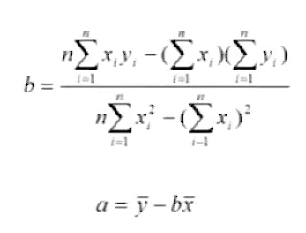

In [9]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = 10
b = (n * np.sum(zp*ks) - (np.sum(zp) * np.sum(ks))) / (n * np.sum(zp**2) - np.sum(zp)**2)
b     

2.6205388824027653

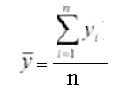

In [10]:
y_mean = np.mean(ks)
y_mean

709.9

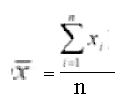

In [11]:
x_mean = np.mean(zp)
x_mean

101.4

In [12]:
a = y_mean - b*x_mean
a

444.17735732435955

In [26]:
y_h = a + b * zp
y_h

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

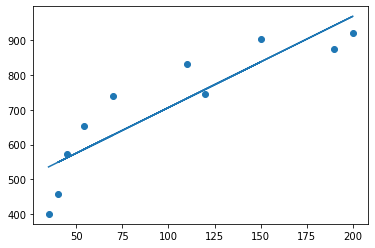

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(zp,ks)
plt.plot(zp,y_h)
plt.show()

In [64]:
np.sum((ks - y_h)**2)/n

6470.414201176658

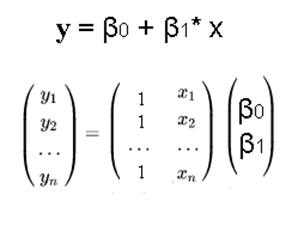

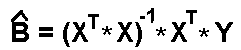

In [20]:
import seaborn as sns

In [25]:
X = zp.reshape((10,1))
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [42]:
y = ks.reshape(10,1)
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [43]:
B = np.dot(np.linalg.inv(np.dot(X. T, X)), X. T@y)
B

array([[5.88982042]])

In [44]:
y_hat = B * zp
y_hat

array([[ 206.1437147 ,  265.04191891, 1119.06587983, 1177.96408403,
         235.59281681,  412.28742941,  318.05030269,  883.47306302,
         706.77845042,  647.88024621]])

In [48]:
 y_hat =  y_hat.reshape(10)

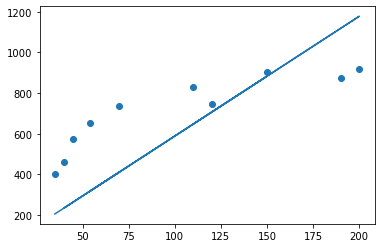

In [49]:
plt.scatter(zp, ks)
plt.plot(zp, y_hat)
plt.show()

#### 2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [54]:
def mse(B1, y=ks, X=zp, n=10):
    return np.sum((B1 * X - y)**2)/n

In [71]:
alpha = 1e-6
B1 = 0.1

for i in range (1500):
    B1 -=alpha * (2/n) * np.sum((B1*zp-ks)*zp)
    if i%100 == 0:
        print ('Iteration: {i},B1={B1},mse={mse}'.format(i = i, B1=B1, mse = mse(B1)))

Iteration: 0,B1=0.25952808,mse=493237.7212546963
Iteration: 100,B1=5.54537842245223,mse=58151.31823171113
Iteration: 200,B1=5.868748638669329,mse=56522.97550129376
Iteration: 300,B1=5.888531320728348,mse=56516.88130936019
Iteration: 400,B1=5.8897415574471985,mse=56516.85850140053
Iteration: 500,B1=5.889815595583751,mse=56516.858416040064
Iteration: 600,B1=5.889820124983314,mse=56516.85841572062
Iteration: 700,B1=5.889820402076462,mse=56516.85841571941
Iteration: 800,B1=5.88982041902807,mse=56516.8584157194
Iteration: 900,B1=5.889820420065112,mse=56516.85841571941
Iteration: 1000,B1=5.8898204201285544,mse=56516.85841571941
Iteration: 1100,B1=5.889820420132437,mse=56516.85841571943
Iteration: 1200,B1=5.889820420132673,mse=56516.85841571943
Iteration: 1300,B1=5.889820420132673,mse=56516.85841571943
Iteration: 1400,B1=5.889820420132673,mse=56516.85841571943


#### 3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).